In [2]:
%pylab qt
from scipy.integrate import odeint

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig("../images/chap6/"+filename, bbox_inches="tight", dpi=600)
    return

Populating the interactive namespace from numpy and matplotlib


In [5]:
########################
# PARAMÈTRES DU PROBLÈME
########################
v0 = 14   # Vitesse du lancé en m.s^-1
g = 9.81  # Accélération de pesanteur en m.s^-2
h = 2.6   # Hauteur de libération du poids en m
a = 45 * np.pi / 180 # Angle du lancer en rad
t = np.linspace(0,5,1000) # Temps en s

#########################
# EXPRESSIONS ANALYTIQUES
#########################
def x_ana(t):
    """Abscisse"""
    return v0 * np.cos(a) * t
def z_ana(t):
    """Altitude"""
    return -g * t**2 / 2 + v0 * np.sin(a) * t + h
# distance du lancer
delta = (v0**2 * np.sin(a)**2 + 2 * g * h) / (v0**2 * np.cos(a)**2)
d = (np.tan(a) + np.sqrt(delta)) * v0**2 * np.cos(a)**2/g
print(d)

V0 = [0, h, v0*np.cos(a), v0*np.sin(a)]
def lancer_de_poids(V, t):
    x, z, vx, vz = V
    dvx = 0
    dvz = -g
    dx = vx
    dz = vz
    return [dx, dz, dvx, dvz]
V = odeint(lancer_de_poids, V0, t)
x_num = V[:,0]
z_num = V[:,1]

############################
# REPRÉSENTATIONS GRAPHIQUES
############################
fig, ax = plt.subplots()
plt.fill_between([0,25],-1,[0,0],color="k",facecolor="k", alpha=.5) # Le sol

plt.plot(x_ana(t), z_ana(t), label="Analytique")
plt.plot(x_num, z_num, label="Numérique")
plt.plot([d], [0], "o")

plt.xlim(0,25)
plt.ylim(-1,10)
ax.set_aspect("equal")
plt.xlabel("Distance (m)")
plt.ylabel("Altitude (m)")
plt.legend()

22.308216249011718


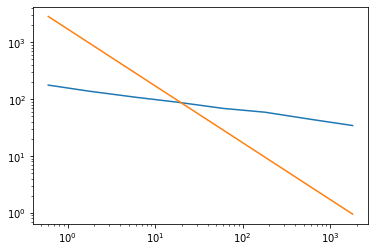

In [51]:
# Exercice résolution de problème avion de chasse

# Accélération maximale supportée
# https://fr.wikipedia.org/wiki/G_(acc%C3%A9l%C3%A9ration)#Tol%C3%A9rance_du_corps_humain_selon_la_NASA
a_max   = np.array([18,14,11,9,7,6,4.5,3.5])*9.81  # m.s^-2
delta_t = np.array([0.6,1.8,6,18,60,180,600,1800]) # s

v = 1.6 * 340
def a(t):
    """accélération en fonction de la durée du demi-tour"""
    return np.pi*v/t

plt.loglog(delta_t, a_max)
plt.plot(delta_t, a(delta_t))

In [12]:
t = np.linspace(0,2,1000)
plt.plot(t, np.cos(2*np.pi*t - 5*np.pi/6))